In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Load the data set we will be working with
"""

data_dir = 'Datasets'
dataset_name = 'BioTIME Study 373'

df = pd.read_csv(f'{data_dir}/study_373/top_5_373_linear.csv')
df.drop(columns = 'DATE', inplace = True)
df = (df - df.mean()) / df.std()
display(df)

,46670,46982,46504,46571,46888
0,-1.082710,-0.790789,-0.800534,-0.792032,-0.025168
1,-1.082710,-0.782978,-0.800534,-0.792032,-0.025168
2,-1.082710,-0.775166,-0.800534,-0.792032,-0.025168
3,-1.082710,-0.767355,-0.800534,-0.792032,-0.025168
4,-1.082710,-0.759544,-0.800534,-0.792032,-0.025168
...,...,...,...,...,...
1611,-0.749251,0.076269,-0.800534,-0.792032,-0.025168
1612,-0.773070,0.216873,-0.800534,-0.792032,-0.025168
1613,-0.796888,0.357477,-0.800534,-0.792032,-0.025168
1614,-0.820707,0.498081,-0.800534,-0.792032,-0.025168


In [3]:
"""
Set the parameters for the linear regression here
"""

# We will look at the last three values for each species and try to predict the next value using linear regression
lag = 2

expected = df.iloc[lag:, :]
display(expected)

,46670,46982,46504,46571,46888
2,-1.082710,-0.775166,-0.800534,-0.792032,-0.025168
3,-1.082710,-0.767355,-0.800534,-0.792032,-0.025168
4,-1.082710,-0.759544,-0.800534,-0.792032,-0.025168
5,-1.082710,-0.751732,-0.800534,-0.792032,-0.025168
6,-1.082710,-0.743921,-0.800534,-0.792032,-0.025168
...,...,...,...,...,...
1611,-0.749251,0.076269,-0.800534,-0.792032,-0.025168
1612,-0.773070,0.216873,-0.800534,-0.792032,-0.025168
1613,-0.796888,0.357477,-0.800534,-0.792032,-0.025168
1614,-0.820707,0.498081,-0.800534,-0.792032,-0.025168


In [4]:
def predict(index, species, df, lag):
    data = df.loc[index - lag : index - 1, species]

    y = data.to_numpy()
    x = np.arange(start = index - lag, stop = index)
    
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return m * index + c


In [5]:
predicted = np.array([[predict(index, species, df, lag) for index in range(lag, len(df))] for species in df.columns])

In [6]:
error = pd.DataFrame()

for i, column in enumerate(df.columns):
    error[column] = pd.Series((expected.to_numpy().T - predicted)[i])

display(error)

,46670,46982,46504,46571,46888
0,-2.220446e-16,-1.110223e-16,0.000000e+00,-1.110223e-16,-3.469447e-18
1,4.440892e-16,1.110223e-16,3.330669e-16,4.440892e-16,6.938894e-18
2,2.220446e-16,6.661338e-16,3.330669e-16,2.220446e-16,6.938894e-18
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.040834e-17
4,-8.881784e-16,-8.881784e-16,-7.771561e-16,-7.771561e-16,-4.163336e-17
...,...,...,...,...,...
1609,-7.660539e-15,5.272172e-14,1.110223e-16,1.110223e-16,0.000000e+00
1610,-4.440892e-16,6.383782e-16,-3.330669e-16,-3.330669e-16,-3.469447e-18
1611,-4.440892e-16,-5.123679e-14,-4.440892e-16,-5.551115e-16,-2.081668e-17
1612,-7.438494e-15,-1.781908e-14,0.000000e+00,2.220446e-16,0.000000e+00


In [7]:
import torch
from torcheval.metrics.functional import r2_score

import statistics

np_error = error.to_numpy()
mse_loss = np.mean(np_error * np_error)
r2_loss = statistics.fmean([r2_score(torch.tensor(predicted[i]), torch.tensor(expected[o].tolist())) for i, o in enumerate(expected.columns)])
l1_loss = np.mean(np.abs(np_error))

print(f'MSE: {mse_loss:.4f}')
print(f'R2 Score: {r2_loss:.4f}')
print(f'MAE: {l1_loss:.4f}')

MSE: 1.0339
R2 Score: -0.0340
MAE: 0.3242


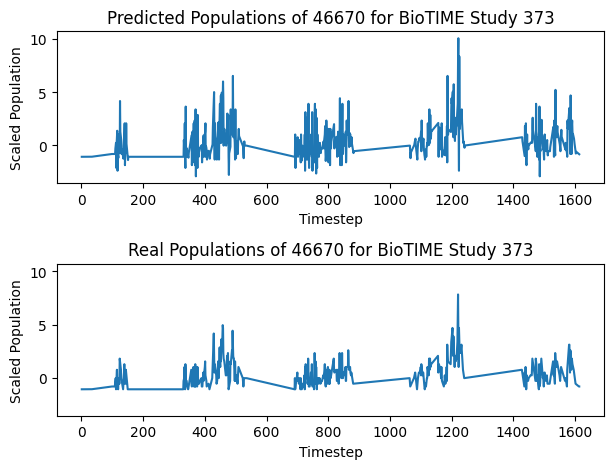

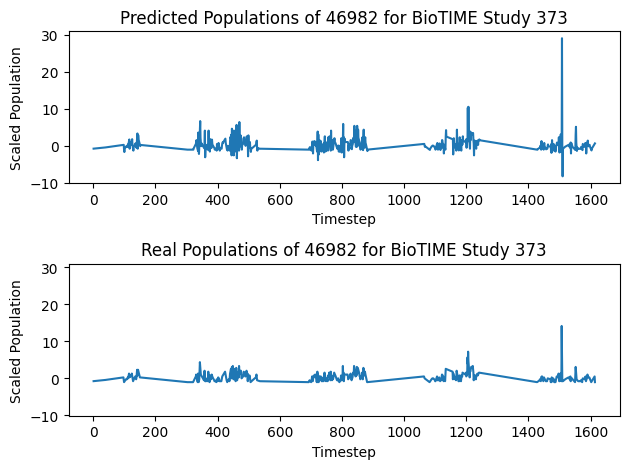

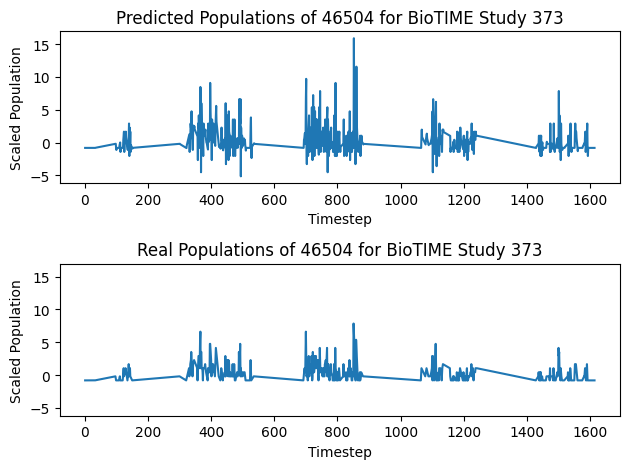

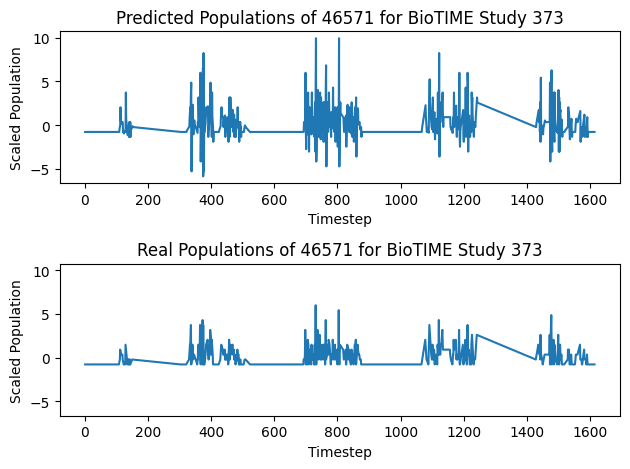

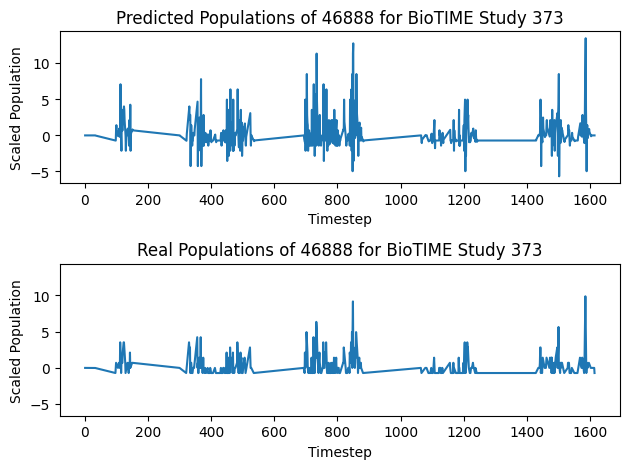

In [8]:
for i, s in enumerate(expected.columns):
    fig, (p, r) = plt.subplots(2, sharey = True)
    
    p.plot(range(1, len(predicted[i]) + 1), predicted[i])
    p.title.set_text(f'Predicted Populations of {s} for {dataset_name}')
    p.set_xlabel('Timestep')
    p.set_ylabel('Scaled Population')
    r.plot(range(1, len(predicted[i]) + 1), expected[s].tolist())
    r.title.set_text(f'Real Populations of {s} for {dataset_name}')
    r.set_xlabel('Timestep')
    r.set_ylabel('Scaled Population')
    plt.tight_layout()
    plt.show()